<a href="https://colab.research.google.com/github/yarkalm/def_metallization/blob/main/Metallization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [163]:
df = pd.read_excel('/content/Датасет_металлург.xlsx')



input_data = df[["CO2","CO","H2","Herm","Magn","Temp","Time","m before","m after"]]
output_data = df[["RedDegr"]]

In [164]:
x = []
y = []
for i in range(len(input_data)):
  tmp = []
  for j in range(len(input_data.iloc[i])):
    tmp.append(np.asarray(input_data.iloc[i].tolist()[j]))
    

  x.append(np.asarray(tmp).astype(np.float32))
  y.append(np.asarray(output_data.iloc[i]).astype(np.float32))

In [165]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data)

In [166]:
y_train.iloc[0]

RedDegr    59.24
Name: 160, dtype: float64

In [167]:
model = LGBMRegressor()
model.fit(x_train, np.ravel(y_train))

LGBMRegressor()

In [168]:
model.predict([x_train.iloc[0]])

array([58.40837567])

In [169]:
row = [80,
       20,
       0,
       0,
       100,
       750,
       30,
       0.45,
       0.41]
yhat = model.predict([row])
print('Prediction: %d' % yhat[0]) 

Prediction: 32


In [170]:
y_pred = []
y_real = []
mae = []
perc = []
for i in range(len(x_train)):
  y_pred.append(model.predict([x_train.iloc[i]]))
  y_real.append(y_train.iloc[i])
for i in range(len(x_test)):
  y_pred.append(model.predict([x_test.iloc[i]]))
  y_real.append(y_test.iloc[i])  
for i in range(len(y_pred)):
  mae.append(abs(y_real[i]-y_pred[i]))
  perc.append(100*mae[i]/y_real[i])

test = pd.DataFrame()
test['Предсказанные']=y_pred
test['Предсказанные'] = test['Предсказанные'].str.get(0)
test['Истинные']=y_real
test['Истинные']=test['Истинные'].str.get(0)
test['Ошибка'] = mae
test['Ошибка'] = test['Ошибка'].str.get(0)
test['Отклонение %'] = perc
test['Отклонение %'] = test['Отклонение %'].str.get(0)
test = test.astype(float)
pd.set_option("display.max_rows", None, "display.max_columns", None)


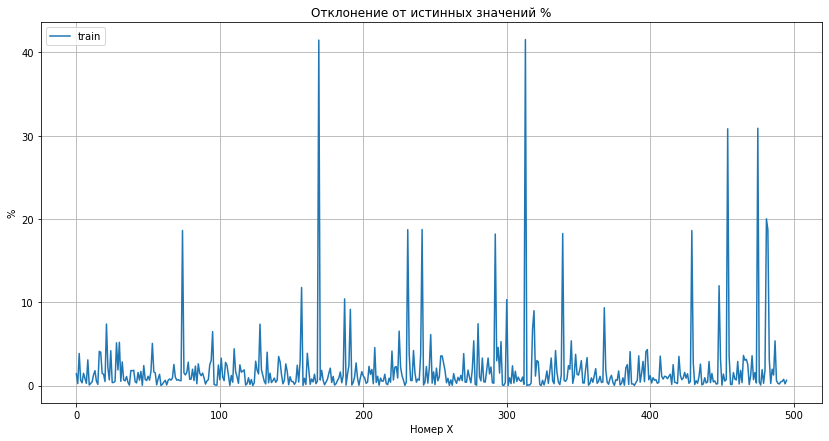

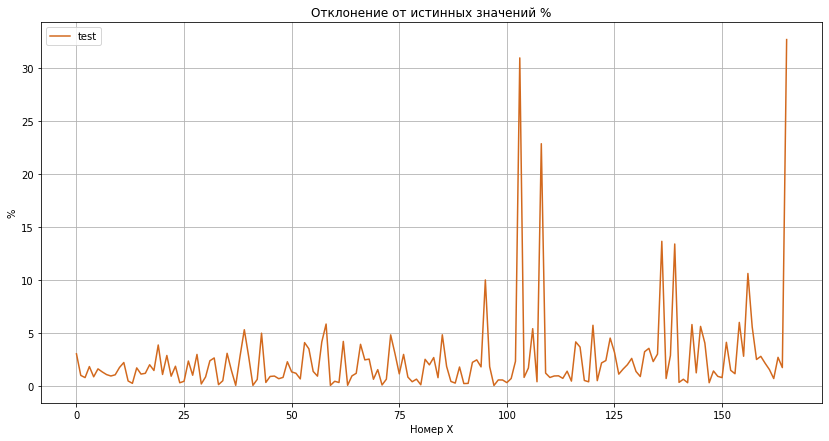

In [171]:
# График отклонения от истинных значений в % на обучающей выборке
plt.figure(figsize=(14, 7))
plt.plot(list(range(len(x_train))),test["Отклонение %"].head(len(x_train)))
plt.title('Отклонение от истинных значений %')
plt.ylabel('%')
plt.xlabel('Номер Х')
plt.legend(['train'], loc='upper left')
plt.grid(True)
plt.savefig("train.png")
plt.show()

# График отклонения от истинных значений в % на обучающей выборке
plt.figure(figsize=(14, 7))
plt.plot(list(range(len(x_test))),test["Отклонение %"].tail(len(y_test)),color='chocolate')
plt.title('Отклонение от истинных значений %')
plt.ylabel('%')
plt.xlabel('Номер Х')
plt.legend(['test'], loc='upper left')
plt.grid(True)
plt.savefig("test.png")
plt.show()